# Problem Set-2 Solutions

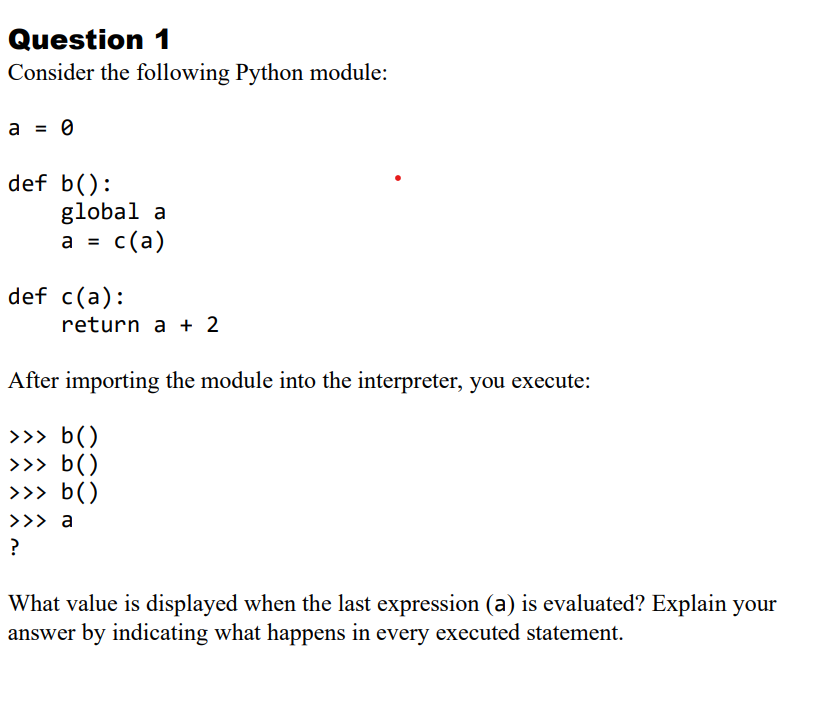

In [8]:
#Solution to Q1

a=0    # a has a global scope

def b():
    global a 
    a=c(a)  # the value of global a changes and is overwritten

def c(a):
    return a+2

b() # in this step the value of global a becomes 2 ; (0+2)

b() # in this step the value of global a becomes 4 ; (2+2)\

b() # in this step the value of global a becomes 6 ; (4+2)
print(a)

6


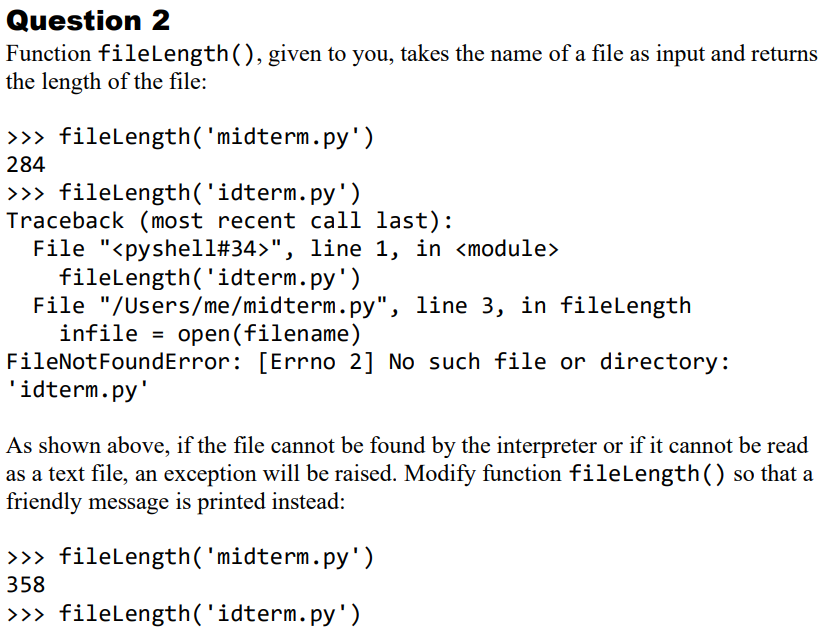

In [9]:
#Solution to Q2

def file_length(file_name):
    try:
        file = open(file_name)
        contents = file.read()
        file.close()
        print(len(contents))
    except FileNotFoundError:
        print("File {} not found".format(file_name))

file_length("idterm.py")

File idterm.py not found


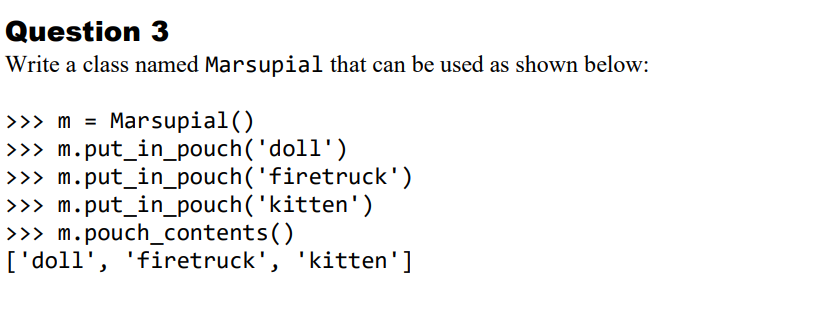
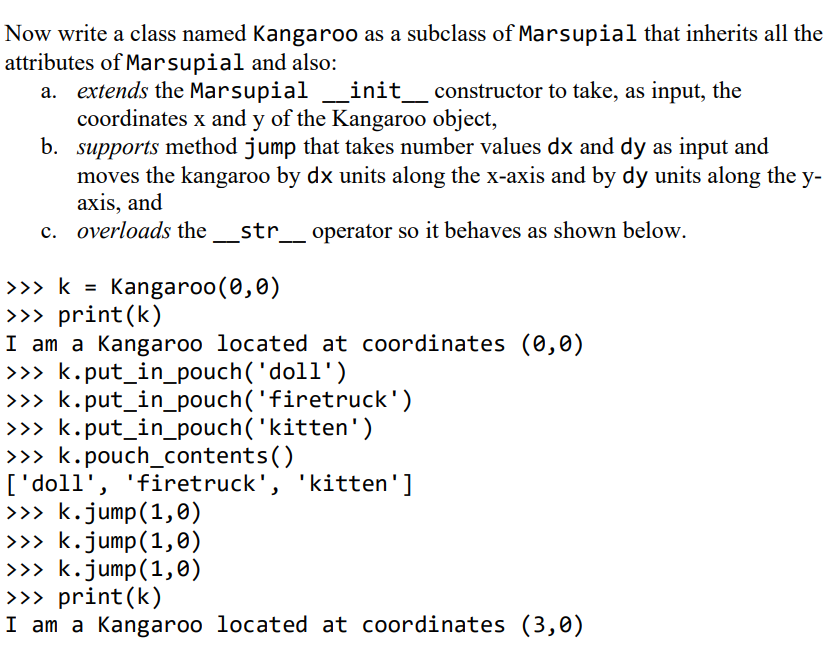

In [12]:
#Solution to Q3

class Marsupial:
    
    def __init__(self):
        self.pouch = []
    
    def put_in_pouch(self,item):
        self.pouch.append(item)
    
    def pouch_contents(self):
        print(self.pouch)
        

m = Marsupial()
m.put_in_pouch('doll')
m.put_in_pouch('firetruck')
m.put_in_pouch('kitten')
m.pouch_contents()

['doll', 'firetruck', 'kitten']


In [18]:
class Kangaroo(Marsupial):
    
    def __init__(self,x=0,y=0):
        Marsupial.__init__(self)
        self.x=x
        self.y=y
        
    def jump(self,dx,dy):
        self.x+=dx
        self.y+=dy
        
    def __str__(self):
        return ("I am a Kangaroo located at cordinates ({},{})".format(self.x,self.y))

In [21]:
k = Kangaroo(0,0)
print(k)
print("\n")
k.put_in_pouch('doll')
k.put_in_pouch('firetruck')
k.put_in_pouch('kitten')
k.pouch_contents()
print("\n")
k.jump(1,0)
k.jump(1,0)
k.jump(1,0)
print(k)

I am a Kangaroo located at cordinates (0,0)


['doll', 'firetruck', 'kitten']


I am a Kangaroo located at cordinates (3,0)


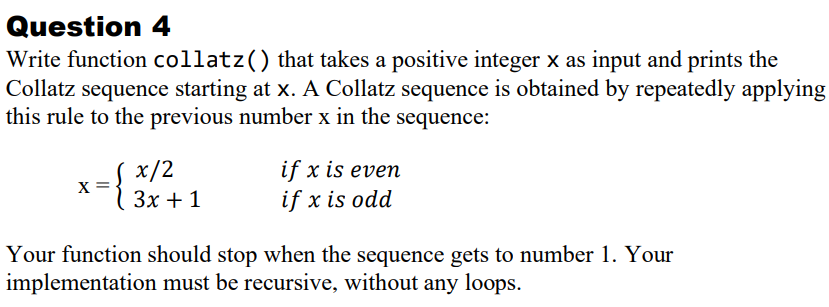
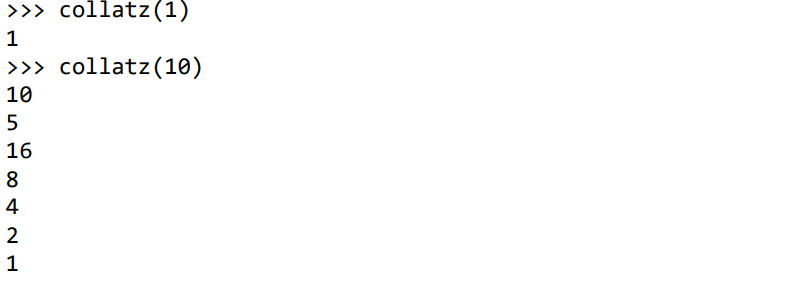

In [40]:
#Solution to Q4

def collatz(x):
    x= int(x)
    if x==1:
        print("1")
        
    else:
        print(x)
        if(x%2==0):
            x=x/2
            if x==1:
                pass
            else: 
                collatz(x)
        else:
            x= 3*x+1
            collatz(x)

In [41]:
collatz(1)

1


In [44]:
collatz(10)

10
5
16
8
4
2


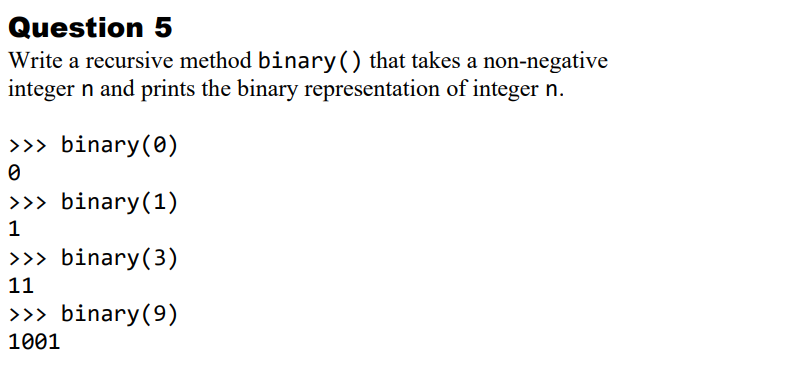

In [26]:
#Solution to Q5

def binary(val):
    b=""
    while (val > 1):
    
        rem = val % 2
        b = str(rem) + b
        val = val // 2
        
    b = str(val) + b
    print(b)

In [27]:
binary(0)
binary(1)
binary(3)
binary(9)

0
1
11
1001


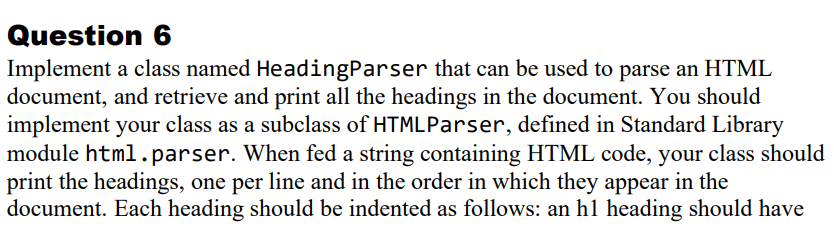
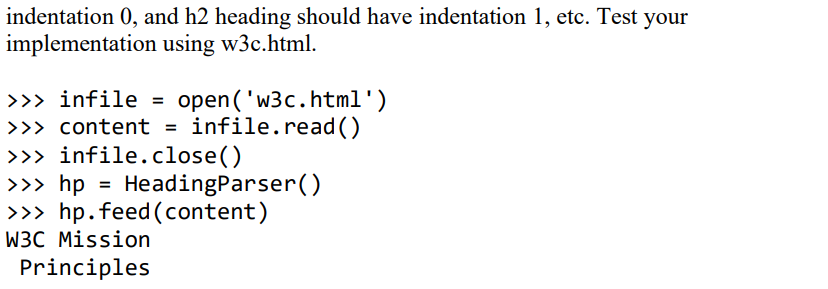

In [2]:
infile = open("w3c.html")
content= infile.read()
print(type(content))
infile.close()
print(content)

<class 'str'>
<!DOCTYPE html>
<html lang="en">

<head>
  <meta name="description" content="Webpage description goes here" />
  <meta charset="utf-8">
  <title>Change_me</title>
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <meta name="author" content="">
  <link rel="stylesheet" href="css/style.css">
</head>

<body>
  
	<h1>W3C Mission</h1>
	<h2>Principles</h2>
	
 


</body>
</html>


In [3]:
from html.parser import HTMLParser
import re

class HeadingParser(HTMLParser):
    
    def __init__(self):
        HTMLParser.__init__(self)
        self.tags=[]
        self.tag_set = set()
        
    def handle_starttag(self, tag, attrs):
        if (tag in re.findall('h[0-9]',tag)):
            self.tags.append(tag)
#         print(self.tag_set)
            
        
    def handle_data(self, data):
        for t in self.tags:
            self.tag_set.add(t)
            if t in self.tag_set:
                print(data.strip())
                
          
                
parser = HeadingParser()
parser.feed(content)


W3C Mission

Principles
Principles






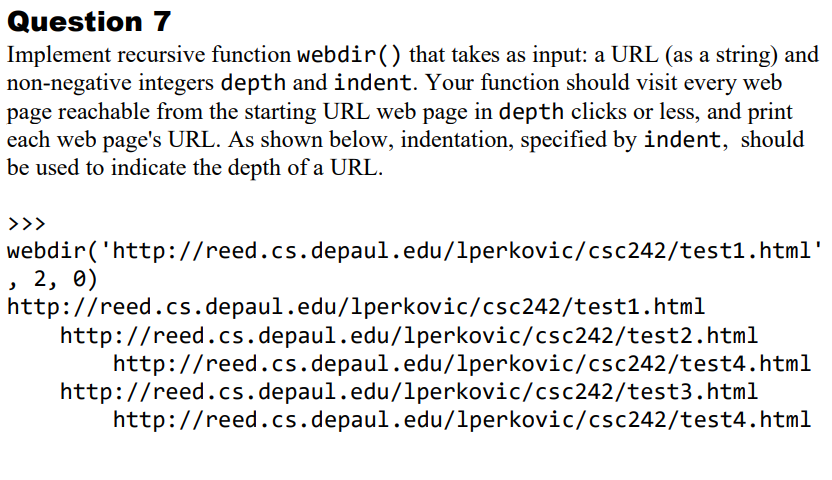

In [75]:
#Solution to Q7

from urllib.parse import urljoin
from html.parser import HTMLParser
class Collector(HTMLParser):
    'collects hyperlink URLs into a list'

    def __init__(self, url):
        'initializes parser, the url, and a list'
        HTMLParser.__init__(self)
        self.url = url
        self.links = []

    
    def handle_starttag(self, tag, attrs):
        'collects hyperlink URLs in their absolute format'
#         print(attrs)
        if tag == 'a':
            for attr in attrs:
                if attr[0] == 'href':
                    # construct absolute URL
                    absolute = urljoin(self.url, attr[1])
                    if absolute[:4] == 'http': # collect HTTP URLs
                        self.links.append(absolute)
                        
    def getLinks(self):
        'returns hyperlinks URLs in their absolute format'
        return self.links

In [76]:
from urllib.request import urlopen
from urllib.parse import urljoin
from html.parser import HTMLParser

visited = set()

def webdir(url,depth,indent):
    
    visited.add(url)
    content = urlopen(url).read().decode()
    collector = Collector(url)
    collector.feed(content)
    urls = collector.getLinks()          
    
    if len(urls)<depth:
        print('{:45}'.format(url))
        for i in range(len(urls)):
            print(" " * (i+1)+ "{:10}".format(urls[i]))
            
    else:
        urls = urls[:depth]
        print('{:45}'.format(url))
        for i in range(len(urls)):
            print(" " * (i+1)+ "{:10}".format(urls[i]))
 
    
    for link in urls:
        if link not in visited:
            try:
                webdir(link,depth,indent)
            except:
                pass
    

In [77]:
webdir('http://reed.cs.depaul.edu/lperkovic/one.html',2,0)

http://reed.cs.depaul.edu/lperkovic/one.html 
 http://reed.cs.depaul.edu/lperkovic/two.html
  http://reed.cs.depaul.edu/lperkovic/three.html
http://reed.cs.depaul.edu/lperkovic/two.html 
 http://reed.cs.depaul.edu/lperkovic/four.html
http://reed.cs.depaul.edu/lperkovic/four.html
 http://reed.cs.depaul.edu/lperkovic/five.html
http://reed.cs.depaul.edu/lperkovic/five.html
 http://reed.cs.depaul.edu/lperkovic/four.html
  http://reed.cs.depaul.edu/lperkovic/one.html
http://reed.cs.depaul.edu/lperkovic/three.html
 http://reed.cs.depaul.edu/lperkovic/four.html


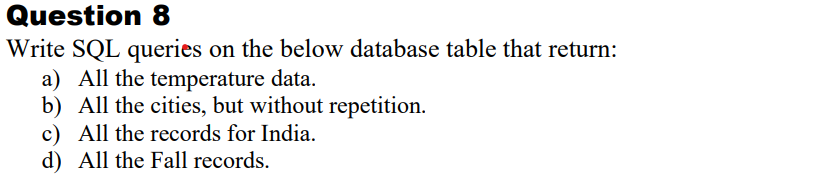
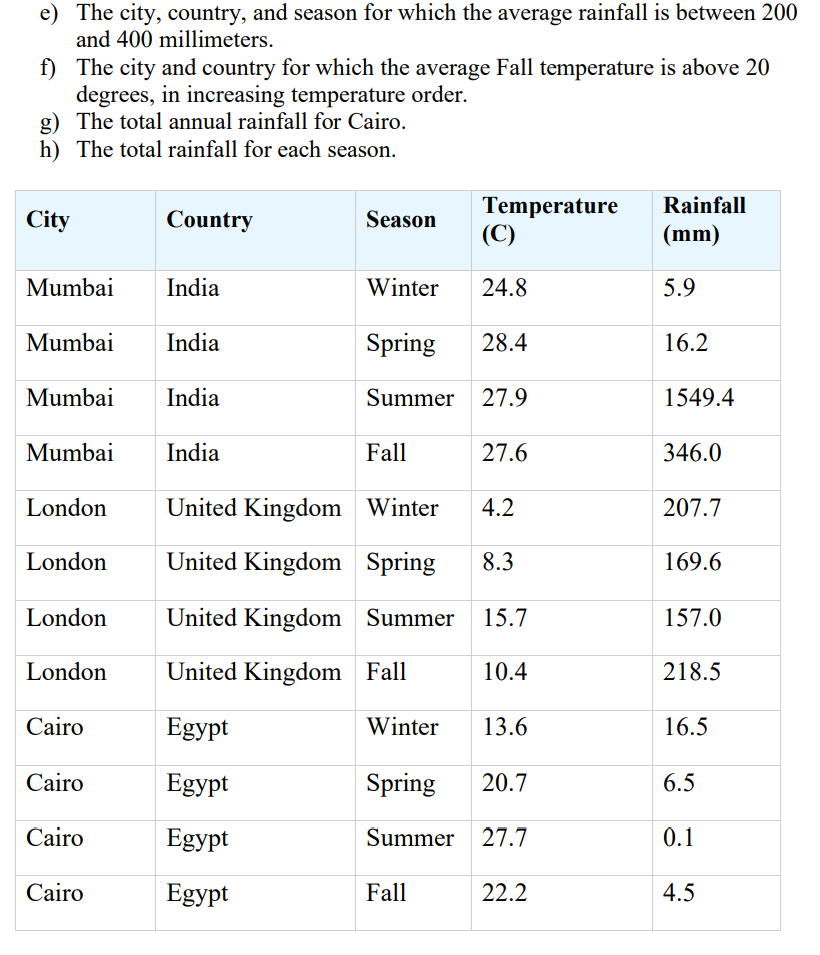

In [49]:
#Solution to Q8

import sqlite3

con = sqlite3.connect('web.db')
cur = con.cursor()
cur.execute("CREATE TABLE Temp (City text,Country text,Season text,Temperature float,Rainfall float)")

In [50]:
records = [
    ('Mumbai', 'India', 'Winter', 24.8, 5.9),
    ('Mumbai', 'India', 'Spring', 28.4, 16.2),
    ('Mumbai', 'India', 'Summer', 27.9, 1549.4),
    ('Mumbai', 'India', 'Fall', 27.6, 346.0),
    ('London', 'United Kingdom', 'Winter', 4.2, 207.7),
    ('London', 'United Kingdom', 'Spring', 8.3, 169.6),
    ('London', 'United Kingdom', 'Summer', 15.7, 157.0),
    ('London', 'United Kingdom', 'Fall', 10.4, 218.5),
    ('Cairo', 'Egypt', 'Winter', 13.6, 16.5),
    ('Cairo', 'Egypt', 'Spring', 20.7, 6.5),
    ('Cairo', 'Egypt', 'Summer', 27.7, 0.1),
    ('Cairo', 'Egypt', 'Fall', 22.2, 4.5) 
]

cur.executemany('INSERT INTO Temp VALUES(?,?,?,?,?);',records);

In [54]:
for row in cur.execute("Select * from Temp"):
    print(row)

('Mumbai', 'India', 'Winter', 24.8, 5.9)
('Mumbai', 'India', 'Spring', 28.4, 16.2)
('Mumbai', 'India', 'Summer', 27.9, 1549.4)
('Mumbai', 'India', 'Fall', 27.6, 346.0)
('London', 'United Kingdom', 'Winter', 4.2, 207.7)
('London', 'United Kingdom', 'Spring', 8.3, 169.6)
('London', 'United Kingdom', 'Summer', 15.7, 157.0)
('London', 'United Kingdom', 'Fall', 10.4, 218.5)
('Cairo', 'Egypt', 'Winter', 13.6, 16.5)
('Cairo', 'Egypt', 'Spring', 20.7, 6.5)
('Cairo', 'Egypt', 'Summer', 27.7, 0.1)
('Cairo', 'Egypt', 'Fall', 22.2, 4.5)


In [55]:
#Answer to a
for row in cur.execute("Select Temperature from Temp"):
    print(row)

(24.8,)
(28.4,)
(27.9,)
(27.6,)
(4.2,)
(8.3,)
(15.7,)
(10.4,)
(13.6,)
(20.7,)
(27.7,)
(22.2,)


In [56]:
#Answer to b
for row in cur.execute("Select DISTINCT City from Temp"):
    print(row)

('Mumbai',)
('London',)
('Cairo',)


In [59]:
#Answer to c
for row in cur.execute("Select * from Temp where Country = 'India' "):
    print(row)

('Mumbai', 'India', 'Winter', 24.8, 5.9)
('Mumbai', 'India', 'Spring', 28.4, 16.2)
('Mumbai', 'India', 'Summer', 27.9, 1549.4)
('Mumbai', 'India', 'Fall', 27.6, 346.0)


In [60]:
#Answer to d
for row in cur.execute("Select * from Temp where Season = 'Fall' "):
    print(row)

('Mumbai', 'India', 'Fall', 27.6, 346.0)
('London', 'United Kingdom', 'Fall', 10.4, 218.5)
('Cairo', 'Egypt', 'Fall', 22.2, 4.5)


In [61]:
#Answer to e
for row in cur.execute("Select distinct City,Country,Season from Temp where Rainfall>=200 AND Rainfall<=400 "):
    print(row)

('Mumbai', 'India', 'Fall')
('London', 'United Kingdom', 'Winter')
('London', 'United Kingdom', 'Fall')


In [62]:
#Answer to f
for row in cur.execute("Select City,Country from Temp where Season = 'Fall' AND Temperature>20 order by Temperature "):
    print(row)

('Cairo', 'Egypt')
('Mumbai', 'India')


In [64]:
#Answer to g
for row in cur.execute("Select City, sum(Rainfall) from Temp where City = 'Cairo' group by City "):
    print(row)

('Cairo', 27.6)


In [65]:
#Answer to h
for row in cur.execute("Select Season, sum(Rainfall) from Temp group by Season "):
    print(row)

('Fall', 569.0)
('Spring', 192.29999999999998)
('Summer', 1706.5)
('Winter', 230.1)


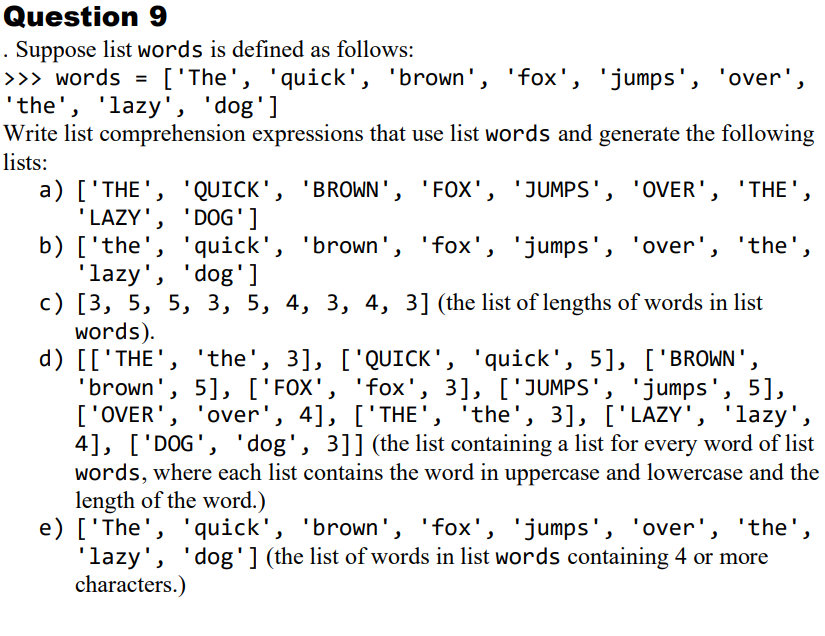

In [66]:
#Solution to Q9

words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over','the', 'lazy', 'dog']

In [67]:
#Answer to a

[i.upper() for i in words]

['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']

In [68]:
#Answer to b

[i.lower() for i in words]

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

In [69]:
#Answer to c

[len(i) for i in words]

[3, 5, 5, 3, 5, 4, 3, 4, 3]

In [70]:
#Answer to d

[[i.upper(),i.lower(),len(i)] for i in words]

[['THE', 'the', 3],
 ['QUICK', 'quick', 5],
 ['BROWN', 'brown', 5],
 ['FOX', 'fox', 3],
 ['JUMPS', 'jumps', 5],
 ['OVER', 'over', 4],
 ['THE', 'the', 3],
 ['LAZY', 'lazy', 4],
 ['DOG', 'dog', 3]]

In [71]:
#Answer to e

[i for i in words if len(i)>=4]

['quick', 'brown', 'jumps', 'over', 'lazy']